### SVD

$A = UDV^T$

Where ==>
* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

### Image compression using SVD

* Downloaded image from [here](https://www.google.com/search?q=dog+images&sxsrf=ALeKk00SlXmYqfSSV6_eCCOnE8w-TPWpYw:1622305119184&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiKheLCpe_wAhXl63MBHVnDBX8Q_AUoAXoECAEQAw&biw=1920&bih=935#imgrc=wzRcY9R2ANhK-M)

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

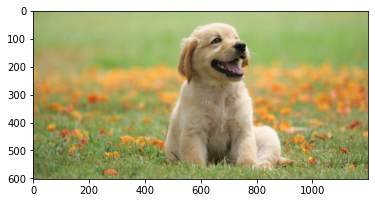

In [8]:
img = Image.open('dog.jpg')
_ = plt.imshow(img)

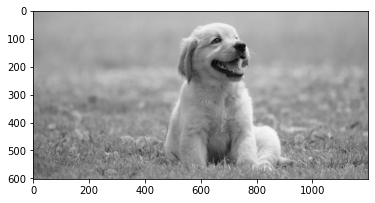

In [10]:
#Convert image to grayscale to avoid to deal with the complexity of multiple color channels: 
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Now convert this image data into numpy matrix

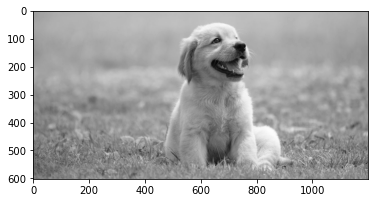

In [13]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [14]:
imgmat.shape

(602, 1200)

Now, Calculate SVD for this image data matrix

In [15]:
U, sigma, V = np.linalg.svd(imgmat)

In [16]:
U.shape

(602, 602)

In [17]:
sigma.shape

(602,)

In [18]:
V.shape

(1200, 1200)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

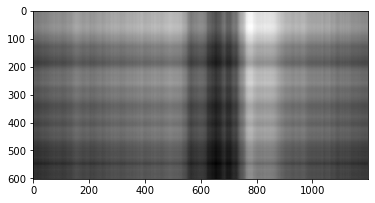

In [19]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

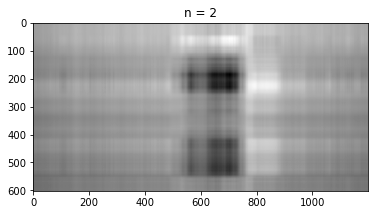

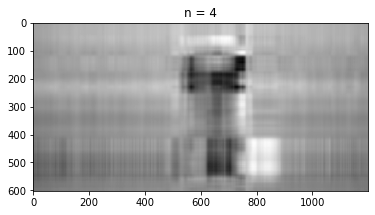

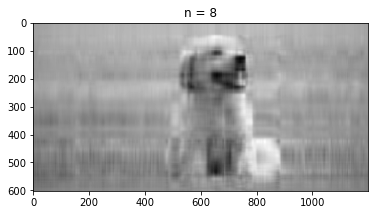

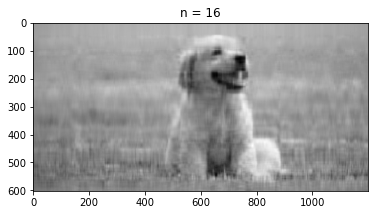

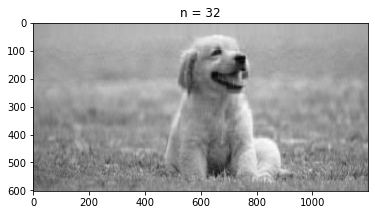

In [21]:
for i in [2, 4, 8, 16, 32]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [23]:
original_img_size = 602*1200
original_img_size

722400

In [24]:
svd_32_size = 602*32+602+1200*32
svd_32_size

58266

In [26]:
round((svd_32_size/original_img_size)*100, 2)

8.07